In [1]:
import scipy.io as sio
import scipy.stats as stats
import copy
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.integrate import odeint
#from mpl_toolkits.axisartist.parasite_axes import HostAxes, ParasiteAxes
plt.style.use('seaborn-whitegrid')

In [2]:
def loadAndPrintSimulationParameters(data):
    print('Global simulation parameters')
    print(f" Generations = {data['p']['gen'][0][0][0][0]}")
    generations = data['p']['gen'][0][0][0][0]
    print(f" NG = {data['p']['NG'][0][0][0][0]}")
    NG = data['p']['NG'][0][0][0][0]
    print(f" splitsize = {data['p']['splitsize'][0][0][0][0]}")
    splitsize = data['p']['splitsize'][0][0][0][0]
    print(f" mu = {data['p']['mu'][0][0][0][0]}")
    mu = data['p']['mu'][0][0][0][0]
    print(f" sigma = {data['p']['sigma'][0][0][0][0]}")
    sigma = data['p']['sigma'][0][0][0][0]
    print(f" Kf = {data['p']['Kf'][0][0][0][0]}")
    Kf = data['p']['Kf'][0][0][0][0]
    print(f" Kb = {data['p']['Kb'][0][0][0][0]}")
    Kb = data['p']['Kb'][0][0][0][0]
    print(f" Random run = {data['p']['randomRun'][0][0][0][0]}")
    Random_run = data['p']['randomRun'][0][0][0][0]
    print(f" Beta seeds = {data['beta_matrices_seeds'][0]}")
    Beta_seeds = data['beta_matrices_seeds'][0]
    print('')
    print('Clustering parameters')      
    print(f" ks = {data['p']['ks'][0][0][0][0]}")
    ks = data['p']['ks'][0][0][0][0]
    print(f" htresh = {data['p']['hthresh'][0][0][0][0]}")
    htresh = data['p']['hthresh'][0][0][0][0]
    print(f" replicas = {data['p']['replicas'][0][0][0][0]}")
    replicas = data['p']['replicas'][0][0][0][0]
    print(f" mink = {data['p']['mink'][0][0][0][0]}")
    mink = data['p']['mink'][0][0][0][0]
    rho = 0.01
    return generations,NG,splitsize,mu,sigma,Kf,Kb,Random_run,Beta_seeds,ks,htresh,replicas,mink,rho

In [3]:
def H_solver_flux(list1, list2):
    size_1 = math.sqrt(np.sum(np.power(list1, 2)))
    updated_list1 = [x / size_1 for x in list1]
    size_2 = math.sqrt(np.sum(np.power(list2, 2)))
    updated_list2 = [x / size_2 for x in list2]
    h_list = [a*b for a,b in zip(updated_list1,updated_list2)]
    return np.sum(h_list)

In [4]:
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)

In [7]:
data = sio.loadmat('C:\\Users\\amitka\\Box Sync\\B-OOLf\\Pap425 Attractor\\AAA Pap425 simulations\\GARD Simulation Project AK\\2020-06-15_13-13-45.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'beta_matrices', 'beta_matrices_seeds', 'compositions', 'fluxes', 'num_init_composition', 'p'])

In [8]:
generations,NG,splitsize,mu,sigma,Kf,Kb,Random_run,Beta_seeds,ks,htresh,replicas,mink,rho = loadAndPrintSimulationParameters(data)

Global simulation parameters
 Generations = 2
 NG = 100
 splitsize = 1
 mu = -4
 sigma = 4
 Kf = 0.01
 Kb = 0.0001
 Random run = 0
 Beta seeds = [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]

Clustering parameters
 ks = 1
 htresh = 0.9
 replicas = 10
 mink = 4


In [9]:
df_temp = pd.DataFrame(data['beta_matrices'][0][0])
df_temp

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.581345,0.405969,0.000237,0.002495,2.577852,0.003552,0.061127,0.000101,0.004321,2.424643,...,14.549397,1.851889,0.013219,0.000039,0.002781,0.002446,0.151948,0.078920,0.000527,13.865117
1,0.026697,0.001702,0.436778,1.220207,0.000006,0.000012,0.001196,0.205009,0.000029,0.001468,...,1.907689,0.048053,0.078711,0.001464,2.564315,0.002473,0.012369,0.026825,0.800859,4.733244
2,0.000607,26.605162,11.380098,0.000023,0.174484,0.004389,0.002402,0.000028,0.000819,0.009176,...,0.025650,0.021884,0.001282,17.372071,0.006744,0.000845,1.060635,0.033013,1.571878,0.004662
3,0.602913,0.149400,0.000072,0.000006,0.015389,0.013218,0.000298,0.001531,0.005075,0.194291,...,0.008924,0.004977,3.044836,0.001623,0.001316,0.806917,38.411487,0.067011,0.119179,0.018054
4,0.003176,0.284720,0.568146,0.947872,0.115532,0.001972,0.005838,0.240365,0.000096,0.127815,...,0.022556,0.000986,0.026950,0.010426,0.002372,0.007025,0.001315,0.037564,0.467303,34.306277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.016887,0.000057,0.222940,0.026248,0.000052,0.006142,0.410492,0.003700,0.000775,0.176139,...,0.000023,0.000424,0.000018,38.030944,0.000006,8.093440,0.057307,1.087483,0.001042,0.002495
96,0.015238,0.028044,0.000110,0.000011,0.164609,0.000318,0.072485,0.000006,0.038685,0.002589,...,1.358369,3.045312,0.000223,0.006150,0.000041,11.786778,0.000884,123.457477,119.097298,0.420531
97,0.002075,0.002257,0.027352,0.000065,35.819030,0.599691,0.579865,0.318872,3.643502,0.180486,...,0.000204,0.533151,0.002822,0.031113,0.001830,0.024110,0.115768,0.047345,0.032322,1.126865
98,0.717587,0.881901,0.004660,0.029064,0.675538,0.000269,0.567869,0.000008,0.006678,0.002170,...,0.023412,0.003798,0.230675,59.875130,0.255454,0.000236,0.248138,0.009752,0.646346,0.000253


In [60]:
# df_compotypes = pd.read_csv('C:\\Users\\amitka\\Box Sync\\B-OOLf\\Pap425 Attractor\\AAA Pap425 simulations\\GARD Simulation Project AK\\Compotypes compositions for experiment 15Jun20.csv',header=None)
# df_compotypes_with_assignment = pd.read_csv('C:\\Users\\amitka\\Box Sync\\B-OOLf\\Pap425 Attractor\\AAA Pap425 simulations\\GARD Simulation Project AK\\Compotypes Database.csv',header=None)
betas = [1,2,6,8,13,15,18,19,21,22,26,27,29,30,31,34,35,36,38,39,40,43,44,46,49,50,51,53,56,57,58,64,66,69,80,82,84,87,89,91,92,93,96,97,98,100]
df_compotypes = pd.read_csv('C:\\Users\\amitka\\Box Sync\\B-OOLf\\Pap425 Attractor\\AAA Pap425 simulations\\GARD Simulation Project AK\\Single Compotype Experiments\\Compotype_Database_singles_18Sep20.csv')

In [61]:
df_compotypes

,1,2,6,8,13,15,18,19,21,22,...,84,87,89,91,92,93,96,97,98,100
0,0.028408,0.532764,0.356643,0.042654,0.140044,0.018163,0.111748,0.454545,0.408088,0.166667,...,0.326087,0.530220,0.251082,54.824916,0.329208,0.094808,0.078297,0.143236,0.175000,0.218045
1,0.034794,4.737892,0.540793,0.146919,0.085339,0.032291,0.077364,0.363636,0.062500,0.222222,...,1.565217,0.090659,0.063853,1.040404,0.278465,0.440181,0.115385,4.615385,0.552273,0.127820
2,3.512993,0.267806,0.104895,14.453791,0.059081,0.034309,0.074499,0.136364,0.121324,6.111111,...,0.043478,0.081044,0.075758,2.609428,0.094059,0.176072,0.059066,0.254642,5.997727,0.045113
3,0.034354,0.051282,0.125874,0.023697,0.159737,0.006054,0.180516,0.181818,1.694853,0.166667,...,0.282609,0.328297,0.044372,0.061728,0.261139,0.167043,6.689560,0.092838,40.611364,0.105263
4,0.049108,0.398860,0.773893,18.370853,3.089716,0.021191,0.094556,0.454545,0.338235,1.500000,...,0.217391,0.648352,0.198052,0.080808,0.085396,0.781038,0.167582,0.193634,0.536364,0.082707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.077956,0.262108,3.086247,0.046209,0.135667,0.293643,0.544413,3.545455,0.733456,0.666667,...,0.543478,0.181319,0.201299,1.870932,0.153465,0.153499,0.061813,0.161804,0.172727,0.248120
96,0.091830,0.205128,0.214452,0.043839,0.317287,0.031282,1.008596,1.045455,0.112132,0.222222,...,0.239130,0.526099,0.137446,0.158249,0.096535,0.860045,0.228022,3.655172,0.727273,0.541353
97,0.037987,0.079772,0.060606,0.496445,0.223195,0.022200,0.106017,1.681818,0.479779,0.277778,...,0.260870,1.300824,0.253247,0.180696,0.636139,0.126411,0.071429,0.084881,0.131818,2.225564
98,1.837040,0.247863,0.177156,0.017773,0.028446,0.033300,0.312321,1.772727,0.248162,0.000000,...,0.130435,0.813187,0.805195,0.806958,0.121287,0.135440,0.048077,0.265252,0.245455,0.127820


In [62]:
output_H_comp_flux = []
for beta_num in list(data['beta_matrices_seeds'][0]):
    if beta_num not in betas:
        continue
    print(beta_num)
#     big_dict[beta_num] = {}
    beta = data['beta_matrices'][0][beta_num-1]
    compotype = np.array(df_compotypes[str(beta_num)])
    bn = (1+((1/np.sum(compotype))*(np.dot(beta,compotype))))
    flux = list(np.multiply((Kf*rho*np.sum(compotype)),bn) - np.multiply((Kb*compotype),bn))
    h_comp_flux = H_solver_flux(flux,compotype)
    output_H_comp_flux.append(h_comp_flux)

1
2
6
8
13
15
18
19
21
22
26
27
29
30
31
34
35
36
38
39
40
43
44
46
49
50
51
53
56
57
58
64
66
69
80
82
84
87
89
91
92
93
96
97
98
100


In [63]:
# output_H_comp_flux = []
# output_dict = {}
# for counter, beta_num in enumerate(assigned_compositions):
#     if beta_num not in output_dict:
#         output_dict[beta_num] = []
#     flux = list(big_dict[beta_num][counter])
#     output_dict[beta_num].append(flux)
#     compotype = list(df_compotypes[counter])
#     h_comp_flux = H_solver_flux(flux,compotype)
#     output_H_comp_flux.append(h_comp_flux)

Min: 0.986059000339494
Max: 0.999995050046959
[ 0  0  0  0  0  0  0  0  4 42] [0.905, 0.915, 0.925, 0.935, 0.9450000000000001, 0.955, 0.965, 0.975, 0.985, 0.995]
[ 0  0  0  0  0  0  0  0  4 42] [0.905, 0.915, 0.925, 0.935, 0.9450000000000001, 0.955, 0.965, 0.975, 0.985, 0.995]


Text(0, 0.5, 'Counts')

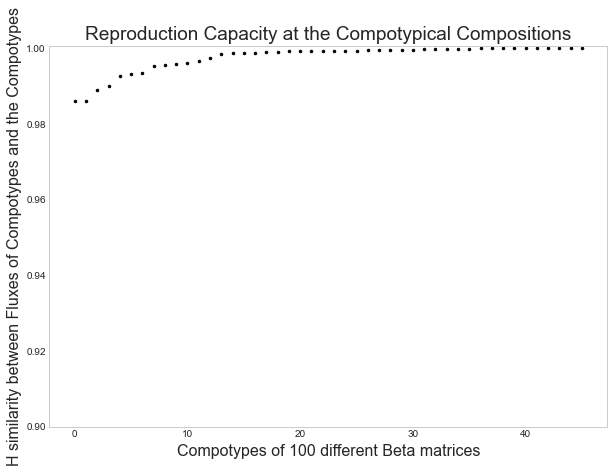

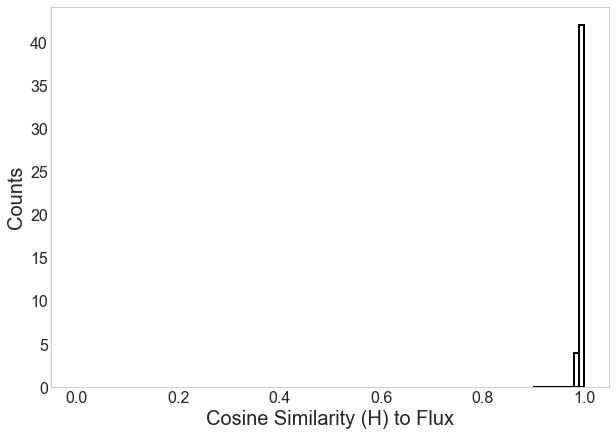

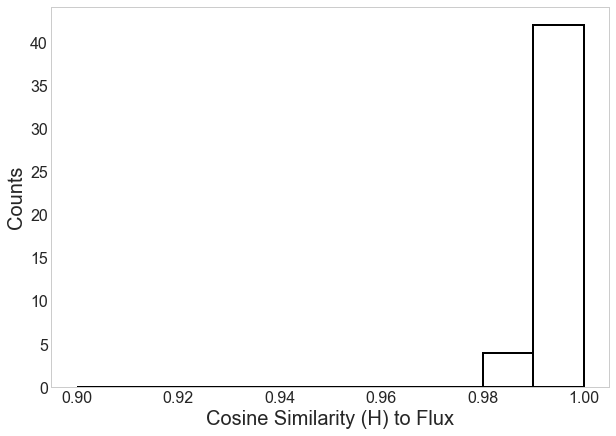

In [64]:
plt.figure(figsize=(10, 7))
plt.plot(sorted(output_H_comp_flux), 'ko', markersize=2.5)
plt.ylim(0.9,1.0005)
# plt.xlim(-0.5,200)
plt.xlabel('Compotypes of 100 different Beta matrices',fontsize=16)
plt.ylabel('H similarity between Fluxes of Compotypes and the Compotypes',fontsize=16)
plt.title('Reproduction Capacity at the Compotypical Compositions', fontsize=19)
plt.grid(False)

print('Min: ' + str(np.min(output_H_comp_flux)))
print('Max: ' + str(np.max(output_H_comp_flux)))


fig, ax = plt.subplots(figsize=(10, 7))
plt.grid(False)
bins_num = 10
bins_seq = np.linspace(0.9,1,bins_num+1)
hist, bins = np.histogram(output_H_comp_flux, bins=bins_seq)#, weights=np.ones(len(h_similarities_list)) / len(h_similarities_list))
bins = list(bins)
bins = [np.mean([x,bins[x_idx+1]]) for x_idx, x in enumerate(bins) if x_idx != len(bins)-1]
print(hist,bins)
plt.bar(bins,hist, width=0.01, ec='k', fc='w',linewidth=2)
plt.xlim(-0.05,1.05)
plt.xlabel("Cosine Similarity (H) to Flux",fontsize=20)
plt.tick_params(labelsize=16)
plt.ylabel("Counts",fontsize=20)
plt.savefig("Compotypes Flux Distribution Single Compotypes.pdf")

        
fig, ax = plt.subplots(figsize=(10, 7))
plt.grid(False)
bins_num = 10
bins_seq = np.linspace(0.9,1,bins_num+1)
hist, bins = np.histogram(output_H_comp_flux, bins=bins_seq)#, weights=np.ones(len(h_similarities_list)) / len(h_similarities_list))
bins = list(bins)
bins = [np.mean([x,bins[x_idx+1]]) for x_idx, x in enumerate(bins) if x_idx != len(bins)-1]
print(hist,bins)
plt.bar(bins,hist, width=0.01, ec='k', fc='w',linewidth=2)
# plt.xlim(-0.05,1.05)
plt.xlabel("Cosine Similarity (H) to Flux",fontsize=20)
plt.tick_params(labelsize=16)
plt.ylabel("Counts",fontsize=20)

# fig, ax = plt.subplots(figsize=(10, 7))
# plt.bar(xaxis,size_counts, width=1, ec='k', fc='w',linewidth=2)
# # plt.title("Histogram of Nmol in Single Compotypes", fontsize=20)
# plt.xlabel("Nmol",fontsize=18)
# plt.tick_params(labelsize=14)
# plt.ylabel("Counts",fontsize=18)
# # ax.set_yscale('log')
# plt.savefig("Nmol Distribution in Single Compotypes.pdf")

In [46]:
df_compotypes = pd.read_csv('C:\\Users\\amitka\\Box Sync\\B-OOLf\\Pap425 Attractor\\AAA Pap425 simulations\\GARD Simulation Project AK\\Compotypes compositions for experiment 15Jun20.csv',header=None)
df_compotypes_with_assignment = pd.read_csv('C:\\Users\\amitka\\Box Sync\\B-OOLf\\Pap425 Attractor\\AAA Pap425 simulations\\GARD Simulation Project AK\\Compotypes Database.csv',header=None)

In [47]:
df_compotypes

,0,1,2,3,4,5,6,7,8,9,...,183,184,185,186,187,188,189,190,191,192
0,0.028408,0.532764,0.052632,0.184783,0.192308,0.853659,1.375,1.105263,0.446860,1.485294,...,0.000000,0.826389,0.818182,0.078297,0.143236,0.175000,0.272727,0.380952,0.457143,0.218045
1,0.034794,4.737892,0.052632,2.565217,0.519231,0.146341,0.000,0.210526,0.236715,0.029412,...,0.363636,0.020833,0.136364,0.115385,4.615385,0.552273,0.836364,2.666667,0.809524,0.127820
2,3.512993,0.267806,0.473684,0.608696,0.384615,2.170732,0.875,0.631579,0.241546,0.536765,...,0.000000,0.076389,0.045455,0.059066,0.254642,5.997727,0.509091,0.428571,0.628571,0.045113
3,0.034354,0.051282,0.263158,0.032609,0.038462,0.865854,2.625,1.000000,0.340580,0.448529,...,0.636364,0.298611,0.181818,6.689560,0.092838,40.611364,0.054545,0.238095,0.200000,0.105263
4,0.049108,0.398860,0.368421,0.326087,0.192308,0.500000,0.750,0.578947,0.248792,0.316176,...,0.181818,0.229167,0.318182,0.167582,0.193634,0.536364,0.109091,0.047619,0.276190,0.082707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.077956,0.262108,0.736842,0.706522,0.673077,0.073171,0.000,0.315789,0.125604,0.463235,...,0.727273,0.368056,0.454545,0.061813,0.161804,0.172727,0.000000,0.095238,0.038095,0.248120
96,0.091830,0.205128,0.263158,0.271739,0.346154,0.292683,0.000,1.000000,0.132850,0.191176,...,0.000000,0.111111,0.363636,0.228022,3.655172,0.727273,0.163636,0.285714,0.123810,0.541353
97,0.037987,0.079772,0.105263,0.206522,0.384615,2.000000,1.500,1.315789,0.082126,0.205882,...,1.181818,0.256944,2.090909,0.071429,0.084881,0.131818,0.163636,0.238095,0.104762,2.225564
98,1.837040,0.247863,0.000000,0.108696,0.115385,0.219512,0.250,0.578947,4.222222,1.485294,...,0.090909,0.541667,0.954545,0.048077,0.265252,0.245455,0.200000,0.238095,0.123810,0.127820


In [48]:
df_compotypes_with_assignment

,0,1,2,3,4,5,6,7,8,9,...,183,184,185,186,187,188,189,190,191,192
0,1.000000,2.000000,3.000000,3.000000,3.000000,4.000000,4.000,4.000000,5.000000,5.000000,...,94.000000,95.000000,95.000000,96.000000,97.000000,98.000000,99.000000,99.000000,99.000000,100.000000
1,0.028408,0.532764,0.052632,0.184783,0.192308,0.853659,1.375,1.105263,0.446860,1.485294,...,0.000000,0.826389,0.818182,0.078297,0.143236,0.175000,0.272727,0.380952,0.457143,0.218045
2,0.034794,4.737892,0.052632,2.565217,0.519231,0.146341,0.000,0.210526,0.236715,0.029412,...,0.363636,0.020833,0.136364,0.115385,4.615385,0.552273,0.836364,2.666667,0.809524,0.127820
3,3.512993,0.267806,0.473684,0.608696,0.384615,2.170732,0.875,0.631579,0.241546,0.536765,...,0.000000,0.076389,0.045455,0.059066,0.254642,5.997727,0.509091,0.428571,0.628571,0.045113
4,0.034354,0.051282,0.263158,0.032609,0.038462,0.865854,2.625,1.000000,0.340580,0.448529,...,0.636364,0.298611,0.181818,6.689560,0.092838,40.611364,0.054545,0.238095,0.200000,0.105263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.077956,0.262108,0.736842,0.706522,0.673077,0.073171,0.000,0.315789,0.125604,0.463235,...,0.727273,0.368056,0.454545,0.061813,0.161804,0.172727,0.000000,0.095238,0.038095,0.248120
97,0.091830,0.205128,0.263158,0.271739,0.346154,0.292683,0.000,1.000000,0.132850,0.191176,...,0.000000,0.111111,0.363636,0.228022,3.655172,0.727273,0.163636,0.285714,0.123810,0.541353
98,0.037987,0.079772,0.105263,0.206522,0.384615,2.000000,1.500,1.315789,0.082126,0.205882,...,1.181818,0.256944,2.090909,0.071429,0.084881,0.131818,0.163636,0.238095,0.104762,2.225564
99,1.837040,0.247863,0.000000,0.108696,0.115385,0.219512,0.250,0.578947,4.222222,1.485294,...,0.090909,0.541667,0.954545,0.048077,0.265252,0.245455,0.200000,0.238095,0.123810,0.127820


Min: 0.9585617848257634
Max: 0.999995050046959


Text(0, 0.5, 'Counts')

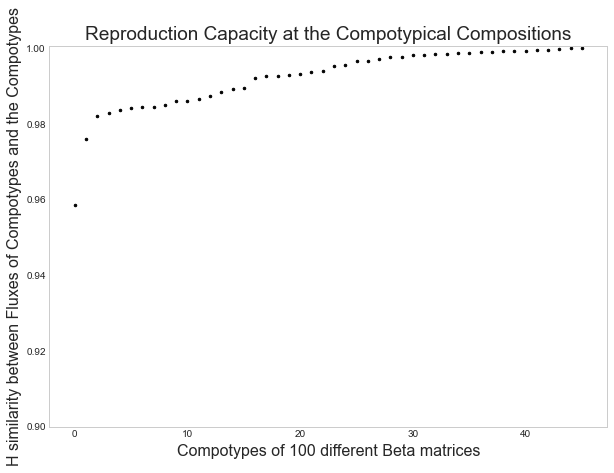

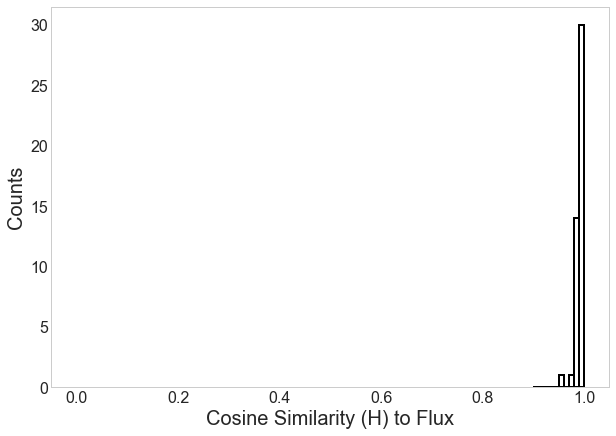

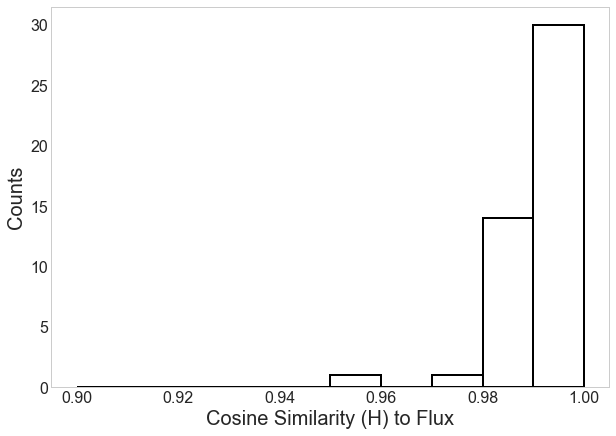

In [70]:
output_H_comp_flux = []
for beta_num in list(data['beta_matrices_seeds'][0]):
#     print(beta_num)
#     big_dict[beta_num] = {}
    beta = data['beta_matrices'][0][beta_num-1]
    for column_idx in range(df_compotypes.shape[1]):
        compotype_id = int(float(df_compotypes_with_assignment.iloc[0,column_idx]))
#         print(compotype_id)
        if compotype_id == int(beta_num):
#             print(beta_num)
            compotype = np.array(df_compotypes_with_assignment.iloc[1:,column_idx])
            bn = (1+((1/np.sum(compotype))*(np.dot(beta,compotype))))
            flux = list(np.multiply((Kf*rho*np.sum(compotype)),bn) - np.multiply((Kb*compotype),bn))
            h_comp_flux = H_solver_flux(flux,compotype)
            output_H_comp_flux.append(h_comp_flux)
            
            
plt.figure(figsize=(10, 7))
plt.plot(sorted(output_H_comp_flux), 'ko', markersize=2.5)
plt.ylim(0.9,1.0005)
# plt.xlim(-0.5,200)
plt.xlabel('Compotypes of 100 different Beta matrices',fontsize=16)
plt.ylabel('H similarity between Fluxes of Compotypes and the Compotypes',fontsize=16)
plt.title('Reproduction Capacity at the Compotypical Compositions', fontsize=19)
plt.grid(False)

print('Min: ' + str(np.min(output_H_comp_flux)))
print('Max: ' + str(np.max(output_H_comp_flux)))


fig, ax = plt.subplots(figsize=(10, 7))
plt.grid(False)
bins_num = 10
bins_seq = np.linspace(0.9,1,bins_num+1)
hist, bins = np.histogram(output_H_comp_flux, bins=bins_seq)#, weights=np.ones(len(h_similarities_list)) / len(h_similarities_list))
bins = list(bins)
bins = [np.mean([x,bins[x_idx+1]]) for x_idx, x in enumerate(bins) if x_idx != len(bins)-1]
# print(hist,bins)
plt.bar(bins,hist, width=0.01, ec='k', fc='w',linewidth=2)

# bins_num = 1
# bins_seq = np.linspace(0,0.9,bins_num+1)
# hist, bins = np.histogram(output_H_comp_flux, bins=bins_seq)#, weights=np.ones(len(h_similarities_list)) / len(h_similarities_list))
# bins = list(bins)
# bins = [np.mean([x,bins[x_idx+1]]) for x_idx, x in enumerate(bins) if x_idx != len(bins)-1]
# # print(hist,bins)
# plt.bar(bins,hist, width=0.9, ec='k', fc='w',linewidth=2)

plt.xlim(-0.05,1.05)
plt.xlabel("Cosine Similarity (H) to Flux",fontsize=20)
plt.tick_params(labelsize=16)
plt.ylabel("Counts",fontsize=20)
plt.savefig("Compotypes Flux Distribution Multiple Compotypes.pdf")
        
fig, ax = plt.subplots(figsize=(10, 7))
plt.grid(False)
bins_num = 10
bins_seq = np.linspace(0.9,1,bins_num+1)
hist, bins = np.histogram(output_H_comp_flux, bins=bins_seq)#, weights=np.ones(len(h_similarities_list)) / len(h_similarities_list))
bins = list(bins)
bins = [np.mean([x,bins[x_idx+1]]) for x_idx, x in enumerate(bins) if x_idx != len(bins)-1]
# print(hist,bins)
plt.bar(bins,hist, width=0.01, ec='k', fc='w',linewidth=2)
# plt.xlim(-0.05,1.05)
plt.xlabel("Cosine Similarity (H) to Flux",fontsize=20)
plt.tick_params(labelsize=16)
plt.ylabel("Counts",fontsize=20)